In [1]:
import numpy as np 
import pandas as pd 

In [2]:
# Classification Models used -

# logistic regression
# Decision tree Classifier
# random forest classifier
# support vector classifier
# XGboost(the Competitive algorithm)
# Neural Network(can be improved further)

# Data Visualization

In [3]:
data = pd.read_csv("dataset.csv")
pd.options.display.max_columns = None

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Columns with missing values
[col for col in data.columns if " " in data[col].value_counts().index.tolist()]

['TotalCharges']

In [8]:
# Replace missing values with NaN
data["TotalCharges"].replace(to_replace = " ", value = np.nan, inplace = True)
data.dropna(inplace = True)

In [9]:
import plotly.express as px
import plotly.graph_objects as go

In [10]:
px.pie(values = data.Churn.value_counts().values.tolist(), names = data.Churn.value_counts().index.tolist(),title = "Y variable distribution")

In [11]:
px.pie(values = data["gender"].value_counts().values.tolist(), names = data["gender"].value_counts().index.tolist(), title = "gender distribution is Telecom")

In [12]:
fig = go.Figure(
    [go.Bar(name = "senior_citizen - 1", x = data[data["SeniorCitizen"] == 1].gender.value_counts().index.tolist(),
            y = data[data["SeniorCitizen"] == 1].gender.value_counts().values.tolist()),
     go.Bar(name = "senior_citizen - 0", x = data[data["SeniorCitizen"] == 0].gender.value_counts().index.tolist(),
            y = data[data["SeniorCitizen"] == 0].gender.value_counts().values.tolist())]
)
fig.update_layout(barmode = "group",title = "gender distribution based on senior citizenship")

In [13]:
px.violin(data["tenure"],box = True, points = "all")

In [14]:
sen = data[data["SeniorCitizen"] == 1]
no_sen = data[data["SeniorCitizen"] == 0]

In [15]:
fig = go.Figure(
    [go.Bar(x = sen.InternetService.value_counts().index.tolist(), y = sen.InternetService.value_counts().values.tolist(), name = "senior_citizens"),
    go.Bar(x = no_sen.InternetService.value_counts().index.tolist(), y = no_sen.InternetService.value_counts().values.tolist(), name = "non-senior_citizens")]
)
fig.update_layout(barmode = "group", title = "internet service differences between senior citizens and young citizens")

In [16]:
dims1 = ['PhoneService', 'MultipleLines', 'OnlineSecurity',"OnlineBackup"]
fig = px.parallel_categories(sen, dimensions = dims1,
                color="MonthlyCharges", color_continuous_scale=px.colors.sequential.Inferno,
                labels ={k:k for k in dims1})
fig.update_layout(title = "comprehensive correlation for senior citizens #1")

In [17]:
dims2 = ["DeviceProtection","TechSupport", "StreamingTV","StreamingMovies"]
fig = px.parallel_categories(sen, dimensions = dims2,
                color="MonthlyCharges", color_continuous_scale=px.colors.sequential.Plotly3,
                labels ={k:k for k in dims2})
fig.update_layout(title = "comprehensive correlation for senior citizens #2")

In [18]:
dims1 = ['PhoneService', 'MultipleLines', 'OnlineSecurity',"OnlineBackup"]
fig = px.parallel_categories(no_sen, dimensions = dims1,
                color="MonthlyCharges", color_continuous_scale=px.colors.sequential.Inferno,
                labels ={k:k for k in dims1})
fig.update_layout(title = "comprehensive correlation for non-senior citizens #1")

In [19]:
dims2 = ["DeviceProtection","TechSupport", "StreamingTV","StreamingMovies"]
fig = px.parallel_categories(no_sen, dimensions = dims2,
                color="MonthlyCharges", color_continuous_scale=px.colors.sequential.Plotly3,
                labels ={k:k for k in dims2})
fig.update_layout(title = "comprehensive correlation for non-senior citizens #2")

In [20]:
px.bar_polar(data, r = data.PaymentMethod.value_counts().values.tolist(), theta = data.PaymentMethod.value_counts().index.tolist(),
                   color = data.PaymentMethod.value_counts().index.tolist(),
                   title = "payment method!")

In [21]:
from plotly.subplots import make_subplots

In [22]:
fig = make_subplots(rows = 1, cols = 2,
                      subplot_titles = ("happily ever after?(senior)","forever single?(non_senior)"),
                    specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(values = sen["Partner"].value_counts().values.tolist(), labels = sen["Partner"].value_counts().index.tolist(),hole = 0.4),1,1)
fig.add_trace(go.Pie(values = no_sen["Partner"].value_counts().values.tolist(), labels = no_sen["Partner"].value_counts().index.tolist(),hole = 0.4),1,2)
fig.show()

In [23]:
px.bar(x = data.Contract.value_counts().index.tolist(), y = data.Contract.value_counts().values.tolist(),
       title = "popularity of telecomm subcription duration", color = data.Contract.value_counts().index.tolist())

In [24]:
px.violin(data["MonthlyCharges"],box = True , points = "all",title = "monthly charges distribution")

In [25]:
px.violin(data["TotalCharges"],box = True , points = "all",title = "total charges distribution")

# Data Visualization

In [26]:
data_copy = data.copy(deep = True)

In [27]:
for col in data_copy.columns[1:]:
  print(f"{col}: \n{data_copy[col].value_counts()}\n\n")

gender: 
Male      3549
Female    3483
Name: gender, dtype: int64


SeniorCitizen: 
0    5890
1    1142
Name: SeniorCitizen, dtype: int64


Partner: 
No     3639
Yes    3393
Name: Partner, dtype: int64


Dependents: 
No     4933
Yes    2099
Name: Dependents, dtype: int64


tenure: 
1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64


PhoneService: 
Yes    6352
No      680
Name: PhoneService, dtype: int64


MultipleLines: 
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64


InternetService: 
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64


OnlineSecurity: 
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64


OnlineBackup: 
No                     3087
Yes                    2425
No internet service    1520
Name: Online

In [28]:
data_copy["OnlineSecurity"].replace(to_replace = ["No internet service"], value = ["No"], inplace = True)
data_copy["OnlineBackup"].replace(to_replace = ["No internet service"], value = ["No"], inplace = True)
data_copy["DeviceProtection"].replace(to_replace = ["No internet service"], value = ["No"], inplace = True)
data_copy["TechSupport"].replace(to_replace = ["No internet service"], value = ["No"], inplace = True)
data_copy["StreamingTV"].replace(to_replace = ["No internet service"], value = ["No"], inplace = True)
data_copy["StreamingMovies"].replace(to_replace = ["No internet service"], value = ["No"], inplace = True)
data_copy["MultipleLines"].replace(to_replace = ["No phone service"], value = ["No"], inplace = True)

In [29]:
label_list = [col for col in data_copy.columns[1:-1] if len(data_copy[col].value_counts().index) == 2]
for col in label_list:
  data_copy[col].replace(to_replace = data_copy[col].value_counts().index.tolist(), value = [*range(0,len(data_copy[col].value_counts().index.tolist()))], inplace = True)

In [30]:
data_copy["TotalCharges"] = data_copy["TotalCharges"].astype(np.float32)

In [31]:
data_copy.drop(['customerID'], axis = 1,inplace = True)

In [32]:
one_hot_list = [data_copy.columns.tolist().index(col) for col in data_copy.columns[1:-1] if len(data_copy[col].value_counts().index) > 2 and type(data_copy[col][0]) == str]

In [33]:
one_hot_list

[7, 14, 16]

In [34]:
data_copy.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [35]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
columnTransformer = ColumnTransformer([('encoder',
                                        OneHotEncoder(),
                                        one_hot_list)],
                                      remainder='passthrough')
data_copy = pd.DataFrame(np.array(columnTransformer.fit_transform(data_copy)))

In [36]:
data_copy.head

<bound method NDFrame.head of        0    1    2    3    4    5    6    7    8    9  10 11 12 13  14 15 16  \
0     1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  1  0  1  0   1  1  0   
1     1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0  0  0  0  34  0  0   
2     1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0  0  0  0   2  0  0   
3     1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0  0  0  0  45  1  0   
4     0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  1  0  0  0   2  0  0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ... .. .. .. ..  .. .. ..   
7027  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0  0  1  1  24  0  1   
7028  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1  0  1  1  72  0  1   
7029  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  1  0  1  1  11  1  0   
7030  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0  1  1  0   4  0  1   
7031  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0  0  0  0  66  0  0   

     17 1

In [37]:
data_copy[26].replace(to_replace = ["Yes","No"], value = [1,0], inplace = True)

In [38]:
from sklearn.model_selection import train_test_split

x = data_copy.iloc[:,:-1].values
y = data_copy.iloc[:,-1].values

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 177013)

In [39]:
from imblearn.combine import SMOTEENN
from collections import Counter


In [40]:
print("Before :",Counter(y_train), len(x_train),len(y_train),"\n")
smoteenn = SMOTEENN()
x_train_re,y_train_re = smoteenn.fit_resample(x_train,y_train)

print("After :",Counter(y_train_re), len(x_train_re),len(y_train_re))

Before : Counter({0: 4138, 1: 1487}) 5625 5625 

After : Counter({1: 2507, 0: 2144}) 4651 4651


In [41]:
from sklearn.metrics import classification_report,roc_auc_score,roc_curve
import matplotlib.pyplot as plt


In [42]:
def eval(algo):
    algo.fit(x_train_re,y_train_re)
    y_pred = algo.predict(x_test)
    print(classification_report(y_test,y_pred))
    y_pred_proba = algo.predict_proba(x_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr ,label = f"auc={str(auc)}")
    plt.legend(loc=4)
    plt.title(f"ROC Curve of {algo}")
    plt.show()

C:\Users\ishaa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



              precision    recall  f1-score   support

           0       0.92      0.69      0.78      1025
           1       0.50      0.83      0.62       382

    accuracy                           0.73      1407
   macro avg       0.71      0.76      0.70      1407
weighted avg       0.80      0.73      0.74      1407



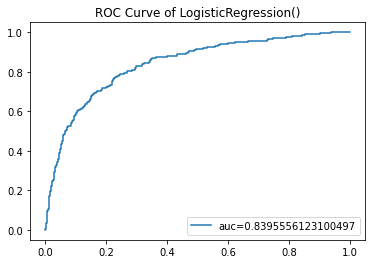

In [43]:
#logistic regression
from sklearn.linear_model import LogisticRegression
eval(algo = LogisticRegression())


              precision    recall  f1-score   support

           0       0.85      0.68      0.75      1025
           1       0.44      0.68      0.53       382

    accuracy                           0.68      1407
   macro avg       0.64      0.68      0.64      1407
weighted avg       0.74      0.68      0.69      1407



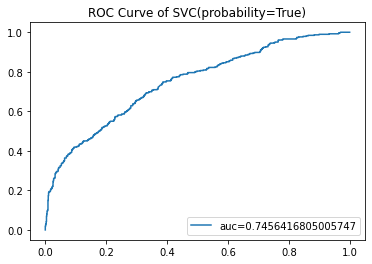

In [44]:
# Support vector classifier

from sklearn.svm import SVC
eval(algo = SVC(probability = True))


              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1025
           1       0.52      0.73      0.61       382

    accuracy                           0.74      1407
   macro avg       0.70      0.74      0.71      1407
weighted avg       0.78      0.74      0.75      1407



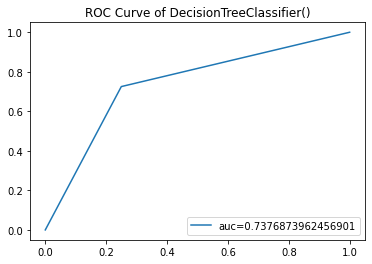

In [45]:
# Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
eval(algo = DecisionTreeClassifier())


              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1025
           1       0.55      0.74      0.63       382

    accuracy                           0.77      1407
   macro avg       0.72      0.76      0.73      1407
weighted avg       0.80      0.77      0.78      1407



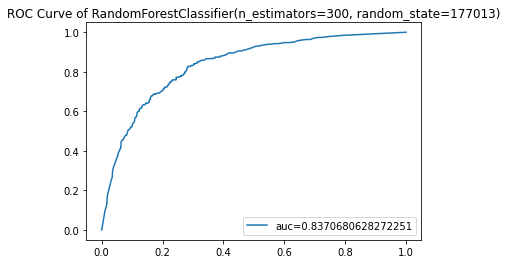

In [46]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
eval(algo = RandomForestClassifier(n_estimators = 300, random_state = 177013))


              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1025
           1       0.54      0.73      0.62       382

    accuracy                           0.76      1407
   macro avg       0.71      0.75      0.72      1407
weighted avg       0.79      0.76      0.77      1407



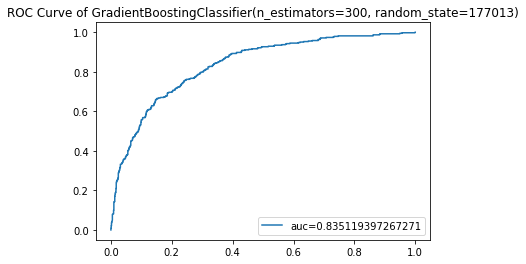

In [47]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
eval(algo = GradientBoostingClassifier(n_estimators = 300, random_state = 177013))

In [48]:
# neural network using tensorflow
import tensorflow
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


In [49]:
N,D = x_train.shape

In [50]:
i = Input(shape = (D,))
x = Dense(16,activation = "relu")(i)
x = Dense(8,activation = "relu")(x)
x = Dense(1,activation = "sigmoid")(x)

model = Model(i,x, name = "churn_banger_9000")

model.compile(loss = "binary_crossentropy", metrics = ["accuracy"], optimizer = Adam(learning_rate = 0.0001))

In [51]:
tensorflow.keras.utils.plot_model(model,show_shapes = True)


('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [52]:
x_train_arr = np.asarray(x_train_re).astype(np.float32)
y_train_arr = np.asarray(y_train_re).astype(np.float32)

In [53]:
x_test_arr = np.asarray(x_test).astype(np.float32)
y_test_arr = np.asarray(y_test).astype(np.float32)

In [54]:
his = model.fit(x_train_arr,y_train_arr, epochs = 75, validation_data = (x_test_arr,y_test_arr))

Epoch 1/75
146/146 [==============================] - 1s 4ms/step - loss: 28.5281 - accuracy: 0.4610 - val_loss: 7.2799 - val_accuracy: 0.7285
Epoch 2/75
146/146 [==============================] - 0s 2ms/step - loss: 2.5256 - accuracy: 0.6313 - val_loss: 0.9085 - val_accuracy: 0.5928
Epoch 3/75
146/146 [==============================] - 0s 2ms/step - loss: 0.5642 - accuracy: 0.7168 - val_loss: 0.8195 - val_accuracy: 0.6077
Epoch 4/75
146/146 [==============================] - 0s 2ms/step - loss: 0.3682 - accuracy: 0.8456 - val_loss: 0.7761 - val_accuracy: 0.6368
Epoch 5/75
146/146 [==============================] - 0s 2ms/step - loss: 0.3318 - accuracy: 0.8671 - val_loss: 0.7380 - val_accuracy: 0.6617
Epoch 6/75
146/146 [==============================] - 0s 2ms/step - loss: 0.3105 - accuracy: 0.8736 - val_loss: 0.7387 - val_accuracy: 0.6588
Epoch 7/75
146/146 [==============================] - 0s 2ms/step - loss: 0.3020 - accuracy: 0.8762 - val_loss: 0.7183 - val_accuracy: 0.6773
Epoch

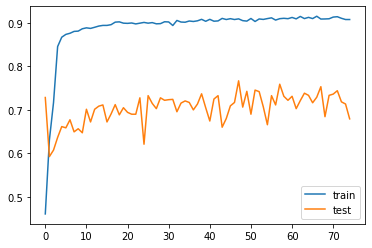

In [55]:
plt.plot(his.history["accuracy"], label = "train")
plt.plot(his.history["val_accuracy"], label = "test")
plt.legend()

In [56]:
y_pred_nn = model.predict(x_test_arr)
y_pred_ceil = [1 if y_pred > 0.5 else 0 for y_pred in y_pred_nn]

In [57]:
print(classification_report(y_test,y_pred_ceil))

              precision    recall  f1-score   support

           0       0.93      0.60      0.73      1025
           1       0.45      0.89      0.60       382

    accuracy                           0.68      1407
   macro avg       0.69      0.74      0.67      1407
weighted avg       0.80      0.68      0.70      1407



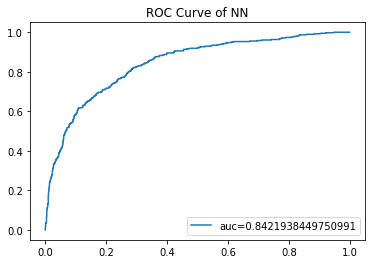

In [58]:
fpr, tpr, _ = roc_curve(y_test,y_pred_nn)
auc = roc_auc_score(y_test, y_pred_nn)
plt.plot(fpr, tpr ,label = f"auc={str(auc)}")
plt.legend(loc=4)
plt.title(f"ROC Curve of NN")
plt.show()